**Step # 01 Clone the Depth Pro Github Repo**

In [2]:
!git clone https://github.com/apple/ml-depth-pro.git

Cloning into 'ml-depth-pro'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 48 (delta 9), reused 2 (delta 2), pack-reused 21 (from 1)
Receiving objects: 100% (48/48), 2.50 MiB | 51.25 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
%cd /content/ml-depth-pro

/content/ml-depth-pro


**Step # 02 Install All the Required Packages**

In [4]:
!pip install -e .

Obtaining file:///content/ml-depth-pro
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 147.5 MB/s eta 0:00:00
  Building editable for depth_pro (pyproject.toml) ... done
  Created wheel for depth_pro: filename=depth_pro-0.1-0.editable-py3-none-any.whl size=4834 sha256=e6be03dc04dad0f77a370e2571780db6d14114d45e758ee42ed81ab1ad997a30
  Stored in directory: /tmp/pip-ephem-wheel-cache-z9ulq7fx/wheels/33/50/70/e123db17c15614a0cee24dd39f1dfcb9463e9eebd0d31e712b
Successfully built depth_pro
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled 

**Step # 03 Download Depth Pro Model Weights**

In [5]:
!source get_pretrained_models.sh

--2025-11-26 16:15:09--  https://ml-site.cdn-apple.com/models/depth-pro/depth_pro.pt
Resolving ml-site.cdn-apple.com (ml-site.cdn-apple.com)... 17.253.118.201, 2403:300:a32:f100::2, 2403:300:a32:f000::1
Connecting to ml-site.cdn-apple.com (ml-site.cdn-apple.com)|17.253.118.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1904446787 (1.8G) [binary/octet-stream]
Saving to: ‘checkpoints/depth_pro.pt’

depth_pro.pt        100%[===================>]   1.77G  23.1MB/s    in 80s     

2025-11-26 16:16:30 (22.6 MB/s) - ‘checkpoints/depth_pro.pt’ saved [1904446787/1904446787]



**Check the Available Options**

In [6]:
!depth-pro-run -h

usage: depth-pro-run [-h] [-i IMAGE_PATH] [-o OUTPUT_PATH] [--skip-display]
                     [-v]

Inference scripts of DepthPro with PyTorch models.

options:
  -h, --help            show this help message and exit
  -i IMAGE_PATH, --image-path IMAGE_PATH
                        Path to input image.
  -o OUTPUT_PATH, --output-path OUTPUT_PATH
                        Path to store output files.
  --skip-display        Skip matplotlib display.
  -v, --verbose         Show verbose output.


**Download Images from Drive into Google Colab Notebook**

In [7]:
!pwd

/content/ml-depth-pro


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!gdown "/content/drive/MyDrive/Car driving on road and small passenger car seat on the road used for daily trips _ Premium Photo.jpeg" -O "Images/"

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=/content/drive/MyDrive/Car driving on road and small passenger car seat on the road used for daily trips _ Premium Photo.jpeg

but Gdown can't. Please check connections and permissions.


In [7]:
!gdown "https://drive.google.com/uc?id=1-PNmddR4WWc2sJSRpdAmD7hnPqb7e5w4&confirm=t" -O "Images/"

Downloading...
From: https://drive.google.com/uc?id=1-PNmddR4WWc2sJSRpdAmD7hnPqb7e5w4&confirm=t
To: /content/ml-depth-pro/Images/image1.jpeg
100% 190k/190k [00:00<00:00, 4.11MB/s]


In [8]:
!gdown "https://drive.google.com/uc?id=1XxjV5f0YBakvj2FpUaDG063htonnPS1I&confirm=t" -O "Images/"

Downloading...
From: https://drive.google.com/uc?id=1XxjV5f0YBakvj2FpUaDG063htonnPS1I&confirm=t
To: /content/ml-depth-pro/Images/image2.jpeg
100% 191k/191k [00:00<00:00, 3.58MB/s]


In [9]:
!gdown "https://drive.google.com/uc?id=14Vx5L5_Sfa41ilwg_CXLsBQcDhIG2GUe&confirm=t" -O "Images/"

Downloading...
From: https://drive.google.com/uc?id=14Vx5L5_Sfa41ilwg_CXLsBQcDhIG2GUe&confirm=t
To: /content/ml-depth-pro/Images/image3.jpg
100% 148k/148k [00:00<00:00, 3.35MB/s]


(np.float64(-0.5), np.float64(625.5), np.float64(416.5), np.float64(-0.5))

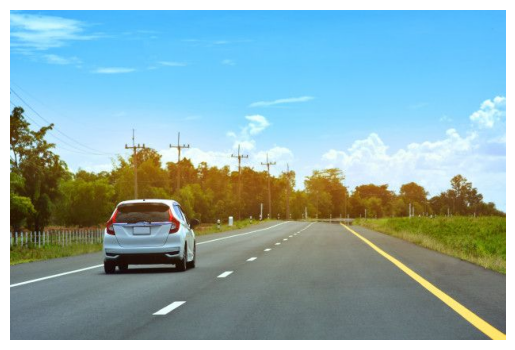

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Car driving on road and small passenger car seat on the road used for daily trips _ Premium Photo.jpeg"

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')


**Step # 04 Run Predictions with Depth Pro**

In [10]:
!depth-pro-run -i "Images/" -o ./output/

  0% 0/1 [00:00<?, ?it/s][Errno 2] No such file or directory: 'Images'
100% 1/1 [00:00<00:00, 3960.63it/s]
Figure(640x480)


In [11]:
from PIL import Image

In [12]:
Image.open("/content/ml-depth-pro/output/car.jpg")

FileNotFoundError: [Errno 2] No such file or directory: '/content/ml-depth-pro/output/car.jpg'

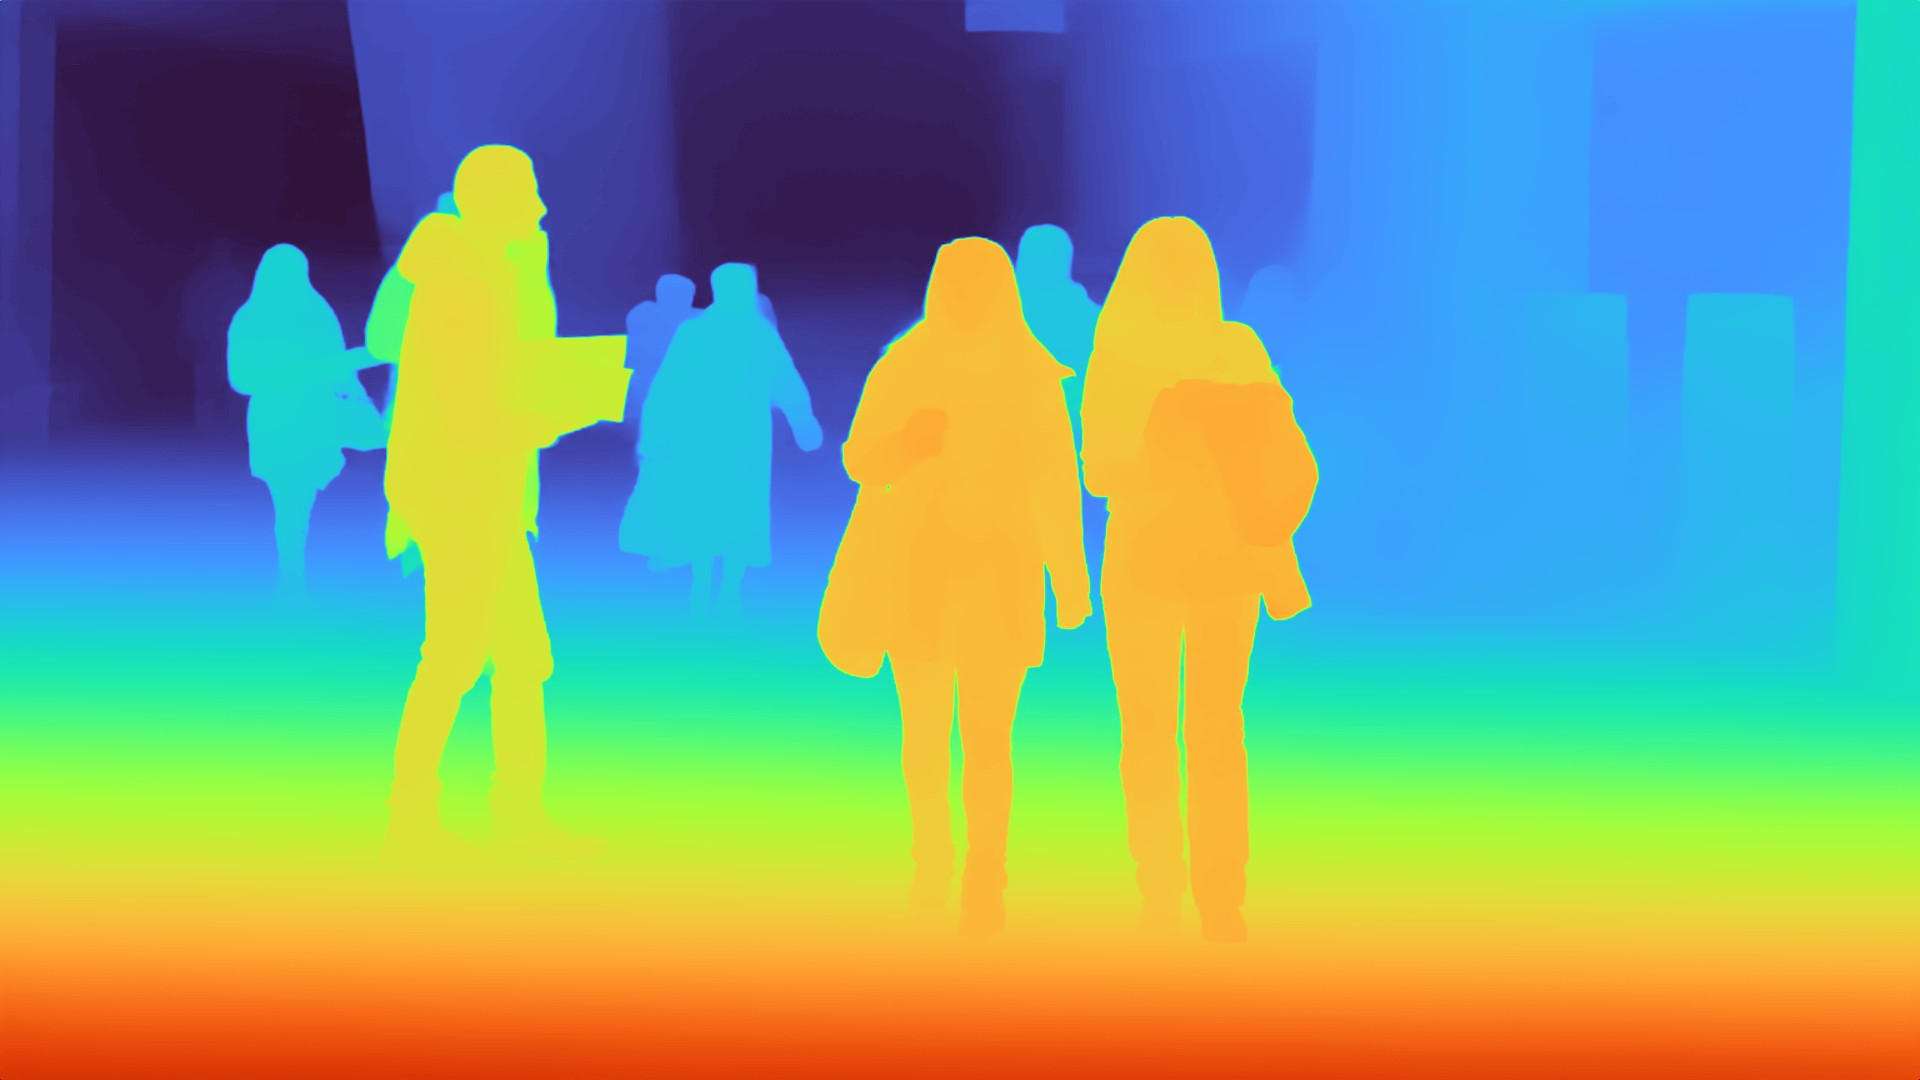

In [ ]:
Image.open("/content/ml-depth-pro/output/image2.jpg")

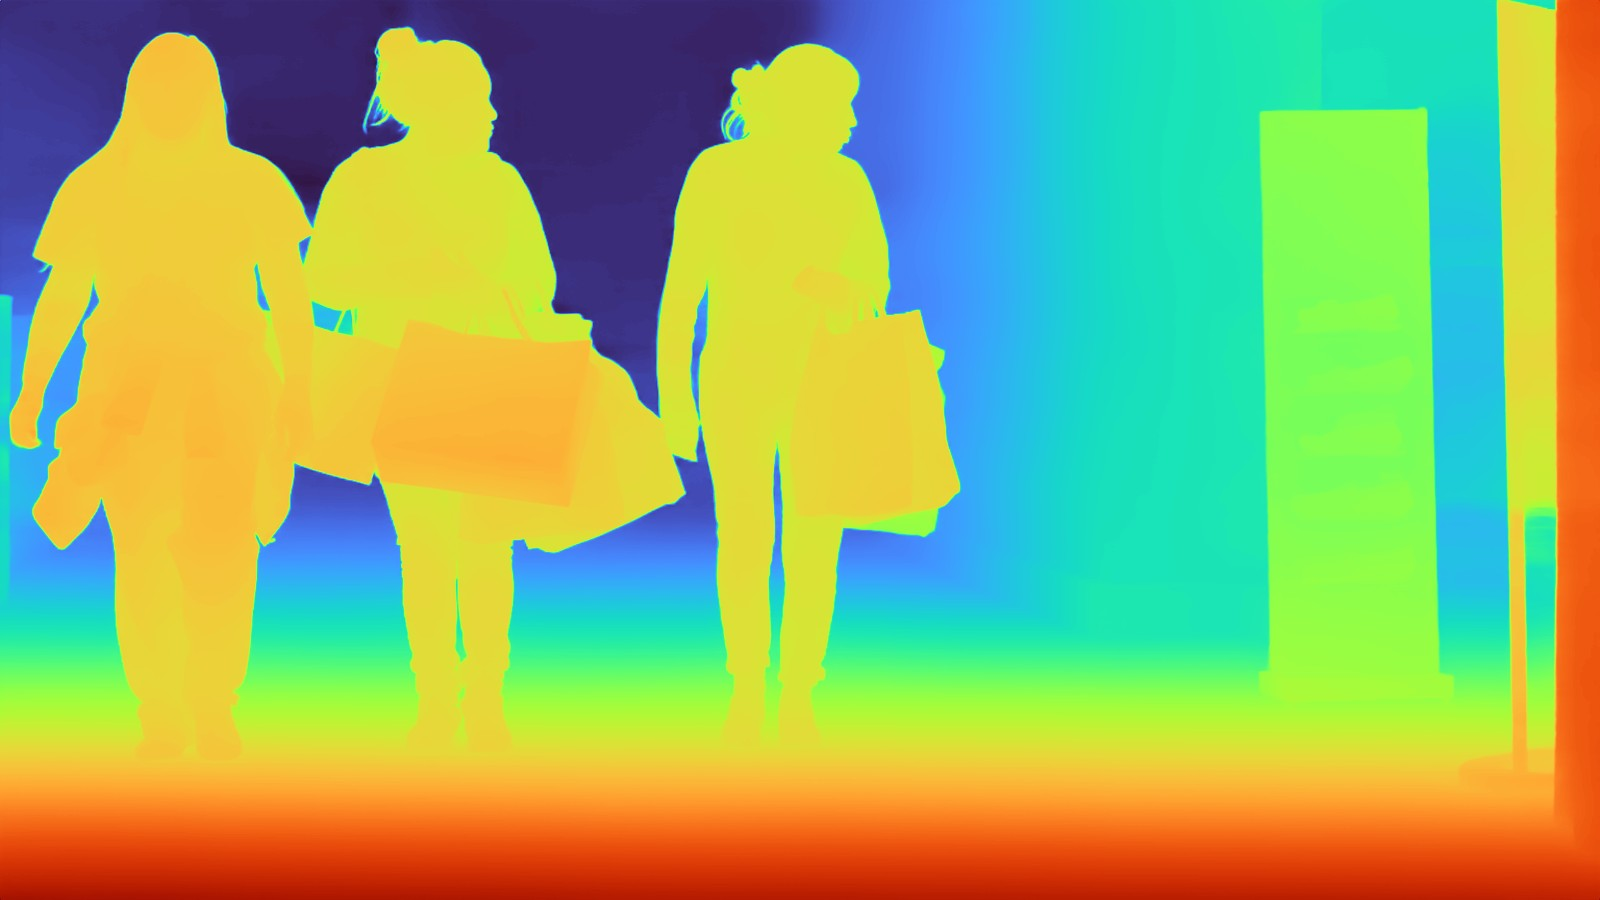

In [ ]:
Image.open("/content/ml-depth-pro/output/image3.jpg")

**Estimate Real Distance to Objects with Depth Pro and YOLO11**

**Install All the Required Packages**

In [13]:
!pip install ultralytics
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
depth-pro 0.1 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [15]:
!gdown "https://drive.google.com/uc?id=1EOz41Ozl-jPZzLKdusziz9wRl6X4DI4Q&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1EOz41Ozl-jPZzLKdusziz9wRl6X4DI4Q&confirm=t
To: /content/ml-depth-pro/depth_test.py
100% 2.26k/2.26k [00:00<00:00, 12.0MB/s]


In [14]:
!python depth_test.py

python3: can't open file '/content/ml-depth-pro/depth_test.py': [Errno 2] No such file or directory


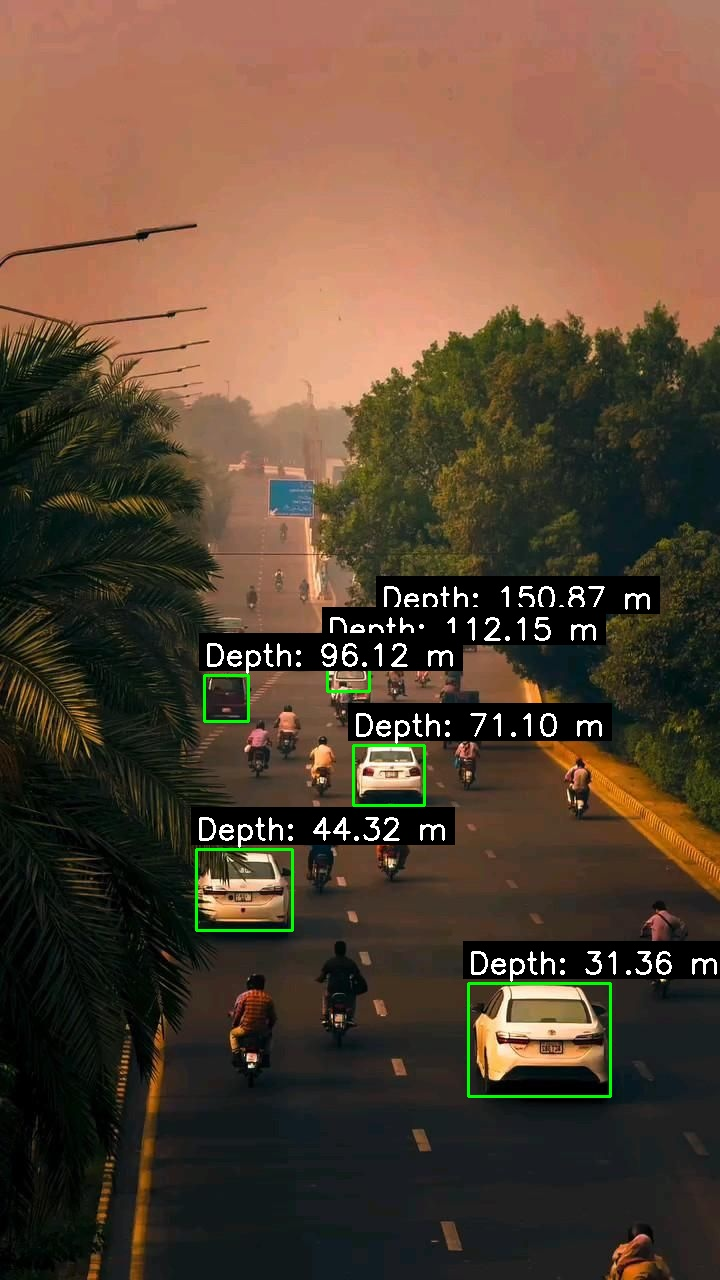

In [43]:
Image.open("/content/ml-depth-pro/depth.jpg")

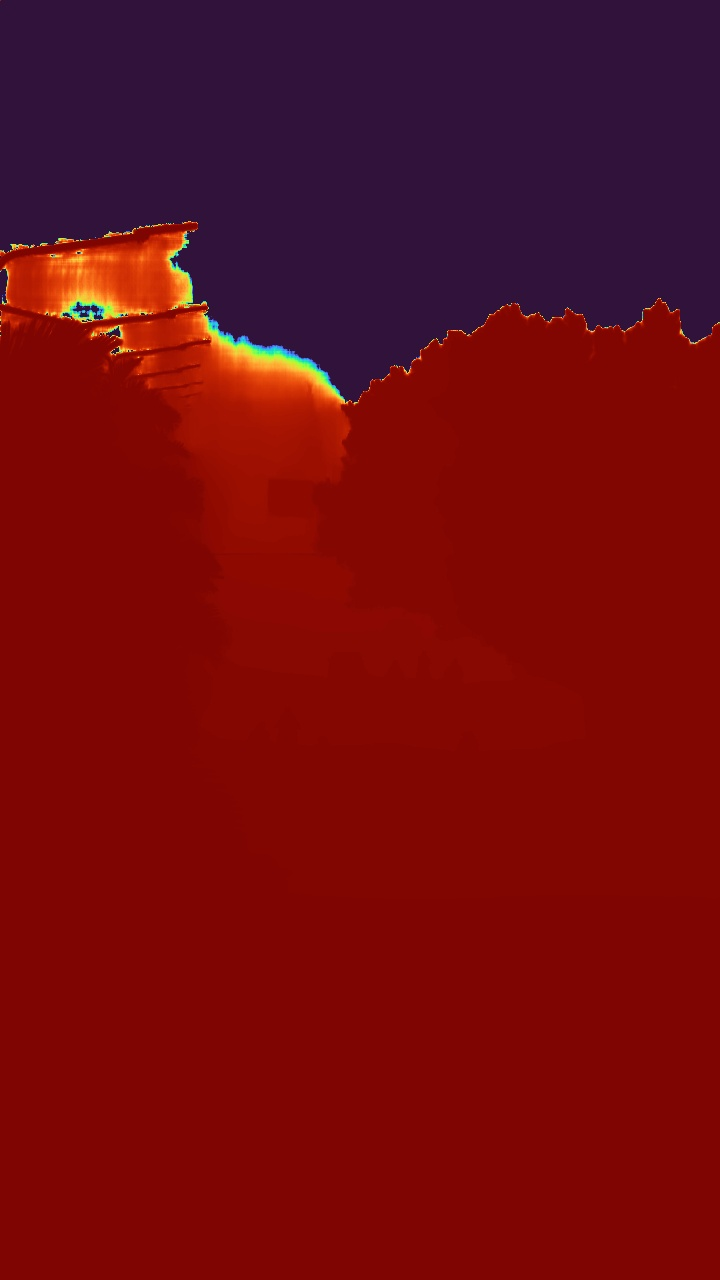

In [44]:
Image.open("/content/ml-depth-pro/depth_colormap.jpg")

In [30]:
!python depth_test.py --input "/content/drive/MyDrive/Soft hues, strong presence_ ✨ Bringing timeless….jpeg"



0: 384x640 14 persons, 1 handbag, 55.3ms
Speed: 4.4ms preprocess, 55.3ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7C3342917830>
<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7C33BCB11FD0>


In [6]:
!pip install git+https://github.com/apple/ml-depth-pro


  Cloning https://github.com/apple/ml-depth-pro to /tmp/pip-req-build-0mkiwmxh
  Running command git clone --filter=blob:none --quiet https://github.com/apple/ml-depth-pro /tmp/pip-req-build-0mkiwmxh
  Resolved https://github.com/apple/ml-depth-pro to commit 9efe5c1def37a26c5367a71df664b18e1306c708
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 129.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.4 MB/s eta 0:00:00
  Created wheel for depth_pro: filename=depth_pro-0.1-py3-none-any.whl size=27593 sha256=874b8edf81fd2e86f89e75763509ddaf71c13015791bc8bdc39f80af1497cdfa
  Stored in directory: /tmp/pip-ephem-wheel-cache-36ghtgod/wheels/5e/f4/fc/2d8e63cd5edf580a404c3bf74e3543c61bfb198bf074972758
Successfully built depth_pro
  Attempting uninst

In [8]:
!pip install "numpy<2.0"


In [9]:
!pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.6/811.6 MB 705.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 99.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 137.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/2

In [11]:
!pip uninstall -y numpy
!pip install numpy==1.26.4


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; pytho

In [12]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement torch==2.1.2 (from versions: 2.2.0+cu118, 2.2.1+cu118, 2.2.2+cu118, 2.3.0+cu118, 2.3.1+cu118, 2.4.0+cu118, 2.4.1+cu118, 2.5.0+cu118, 2.5.1+cu118, 2.6.0+cu118, 2.7.0+cu118, 2.7.1+cu118)
ERROR: No matching distribution found for torch==2.1.2


In [13]:
!pip install git+https://github.com/apple/ml-depth-pro


  Cloning https://github.com/apple/ml-depth-pro to /tmp/pip-req-build-jj9b5ixm
  Running command git clone --filter=blob:none --quiet https://github.com/apple/ml-depth-pro /tmp/pip-req-build-jj9b5ixm
  Resolved https://github.com/apple/ml-depth-pro to commit 9efe5c1def37a26c5367a71df664b18e1306c708
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [16]:
import cv2
from ultralytics import YOLO
import numpy as np
from PIL import Image
import depth_pro

# ----------------------------
# Load YOLO model
# ----------------------------
yolo_model = YOLO("yolo11s.pt")

# ----------------------------
# Load DepthPro model
# ----------------------------
depth_model, transform = depth_pro.create_model_and_transforms()
depth_model.eval()

# ----------------------------
# Input Video
# ----------------------------
video_path = "/content/drive/MyDrive/14433852_1440_2560_30fps.mp4"
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# ----------------------------
# Output Videos
# ----------------------------
fourcc = cv2.VideoWriter_fourcc(*"mp4v")

# 1. Annotated original video
out_annotated = cv2.VideoWriter("output_annotated.mp4", fourcc, fps, (width, height))

# 2. Depth heatmap video
out_depth = cv2.VideoWriter("output_depth.mp4", fourcc, fps, (width, height))

print("Processing video... Please wait...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    orig_frame = frame.copy()

    # ----------------------------
    # YOLO Detection
    # ----------------------------
    results = yolo_model(frame, verbose=False)
    car_boxes = []

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        classes = result.boxes.cls.cpu().numpy()

        for box, cls in zip(boxes, classes):
            if result.names[int(cls)] == "car":
                x1, y1, x2, y2 = map(int, box[:4])
                car_boxes.append((x1, y1, x2, y2))
                cv2.rectangle(orig_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # ----------------------------
    # DepthPro Processing
    # ----------------------------
    pil_img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    image_rgb, _, f_px = depth_pro.load_rgb(pil_img)
    image_tensor = transform(image_rgb)

    prediction = depth_model.infer(image_tensor, f_px=f_px)
    depth = prediction["depth"].squeeze().cpu().numpy()

    # ----------------------------
    # Annotated Original Video Depth Text
    # ----------------------------
    for x1, y1, x2, y2 in car_boxes:
        cx = (x1 + x2) // 2
        cy = (y1 + y2) // 2
        depth_value = depth[cy, cx]

        text = f"{depth_value:.2f} m"

        cv2.putText(orig_frame, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 3)
        cv2.putText(orig_frame, text, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    out_annotated.write(orig_frame)

    # ----------------------------
    # Heatmap Depth Video
    # ----------------------------
    depth_norm = (depth - depth.min()) / (depth.max() - depth.min())
    depth_norm_inv = 1.0 - depth_norm

    depth_color = cv2.applyColorMap((depth_norm_inv * 255).astype("uint8"), cv2.COLORMAP_TURBO)

    out_depth.write(depth_color)

cap.release()
out_annotated.release()
out_depth.release()

print("Processing complete!")
print("Saved output videos:")
print("1. output_annotated.mp4")
print("2. output_depth.mp4")


AttributeError: module 'torch._functorch.eager_transforms' has no attribute 'grad_and_value'